Import required libraries

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Plot style
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")


Load dataset

In [26]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tumor_Detection.csv")
print("Original shape:", df.shape)
df.head()


Original shape: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Clean dataset (drop id and unnamed columns)

In [27]:

df.drop(columns=['id'], inplace=True, errors='ignore')
unnamed_cols = [c for c in df.columns if 'unnamed' in c.lower()]
if unnamed_cols:
    df.drop(columns=unnamed_cols, inplace=True)

print("After cleaning:", df.shape)
df.head()


After cleaning: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check missing values

In [28]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Encode target

Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


/tmp/ipython-input-2377950361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['skyblue', 'salmon'])


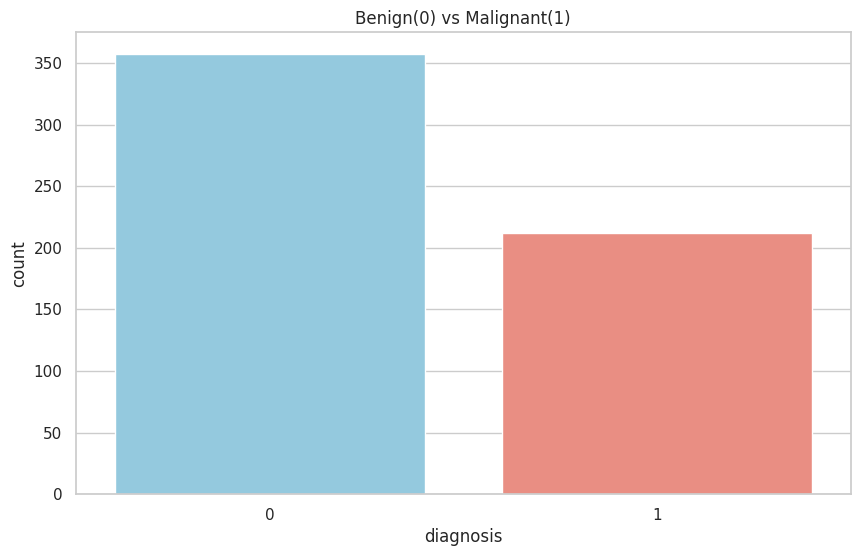

In [29]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

print("Class distribution:")
print(df['diagnosis'].value_counts())

sns.countplot(x='diagnosis', data=df, palette=['skyblue', 'salmon'])
plt.title("Benign(0) vs Malignant(1)")
plt.show()

Split features & labels

In [30]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


Train Random Forest Classifier

In [32]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]


Evaluation metrics

In [33]:

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9649
ROC AUC: 0.9942

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion Matrix

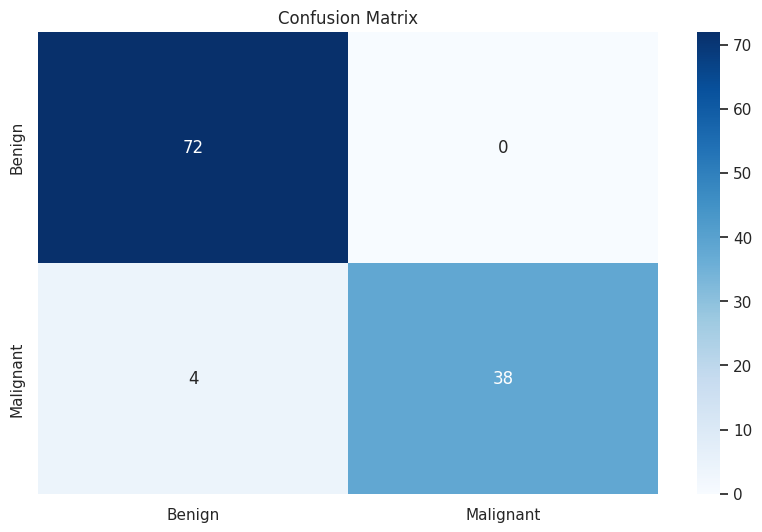

In [34]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix")
plt.show()


Cross Validation

In [35]:

cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print("CV mean:", cv_scores.mean(), "CV std:", cv_scores.std())


CV mean: 0.9543393882937432 CV std: 0.02242725311207944


Feature Importances

Top 10 Features:
 perimeter_worst         0.147912
area_worst              0.132269
concave points_worst    0.110114
concave points_mean     0.088200
radius_worst            0.085116
radius_mean             0.060554
perimeter_mean          0.060465
area_mean               0.044701
concavity_mean          0.044091
concavity_worst         0.032828
dtype: float64


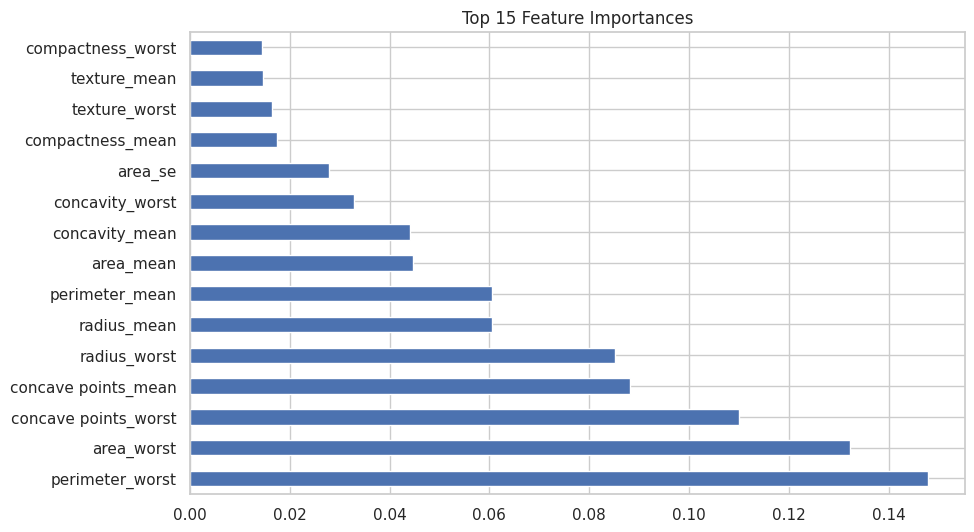

In [36]:

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Top 10 Features:\n", feat_imp.head(10))

feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.show()


Save Model & Scaler

In [37]:

joblib.dump(rf, "tumor_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler saved.")


Model and Scaler saved.


Example: Load & Predict new sample

In [38]:

model = joblib.load("tumor_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example dummy sample (replace with real values in correct order)
sample = np.array(X.iloc[0]).reshape(1,-1)
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)

print("Prediction (0=Benign,1=Malignant):", pred[0])


Prediction (0=Benign,1=Malignant): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
